In [93]:
#Integer division will return float value
from __future__ import division
#Import the libraries that will be used in the analysis.
#Import os to set working directory
import os as osvariable
#Import 3D plot
from mpl_toolkits.mplot3d import Axes3D
#Set working directory
osvariable.chdir("C:/Users/mustafa.oguz/Desktop/Github/Machine_Learning/Machine_Learning/training")
#Import numpy for array operations
import numpy as np
#Suppress scientific notation for numpy
np.set_printoptions(suppress=True)
#Import pandas
import pandas as pd
#Import read_csv to read in csv files
from pandas import read_csv
#Import preprocessing for scaling data before calling some of the classifiers
from sklearn import preprocessing
#Import plotting library
import matplotlib.pyplot as plt
%matplotlib inline
#Import support vector machines
from sklearn import svm

In [94]:
#Support Vector Machine
#Linearly separable case
#Load linearly separable data set
linear = read_csv('linear.csv')

In [95]:
#Support Vector Machine
#Linearly separable case
#Load linearly separable data set
linear = read_csv('linear.csv')
#Get the response variable
y = pd.DataFrame(linear['dep'],columns = ['dep'],index = linear.index.values)
#Drop the response variable from dataset
X_linear = linear.drop(['dep'],axis = 1)
#Set index
X_linear = X_linear.set_index(linear.index.values)
#Get variable names
variable_names = list(X_linear.columns.values)
#Convert X to numpy array
X_linear = np.array(X_linear)
#Make the response variable one dimensional
y = np.ravel(np.array(y))
#Scale the data
X_train_validation_scaled = preprocessing.scale(X_linear)

Imagine we have the following dataset, with only two variables and two classes.

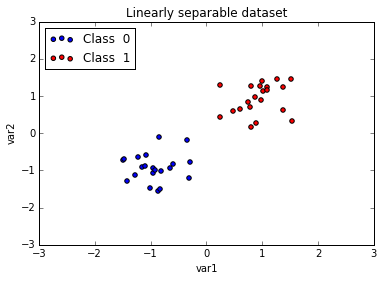

In [96]:
#Support Vector Machine
#Linearly separable case
#Load linearly separable data set
linear = read_csv('linear.csv')
#Get the response variable
y = pd.DataFrame(linear['dep'],columns = ['dep'],index = linear.index.values)
#Drop the response variable from dataset
X_linear = linear.drop(['dep'],axis = 1)
#Set index
X_linear = X_linear.set_index(linear.index.values)
#Get variable names
variable_names = list(X_linear.columns.values)
#Convert X to numpy array
X_linear = np.array(X_linear)
#Make the response variable one dimensional
y = np.ravel(np.array(y))
#Scale the data
X_train_validation_scaled = preprocessing.scale(X_linear)
#Plot the scaled linearly separable data
plt.figure(1)
plt.title('Linearly separable dataset')
plt.scatter(X_train_validation_scaled[(y == 0),0],X_train_validation_scaled[(y == 0),1],c = 'b',label = 'Class  0')
plt.scatter(X_train_validation_scaled[(y == 1),0],X_train_validation_scaled[(y == 1),1],c = 'r',label = 'Class  1')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([x_ticks for x_ticks in xrange(-3,4)])
plt.yticks([y_ticks for y_ticks in xrange(-3,4)])
plt.xlabel('var1')
plt.ylabel('var2')
xx = np.linspace(-3,3,10)
plt.legend(loc = 'upper left')


If we wanted to find the equation for a line that separates the two classes, we might get an infinite number of such lines. In each case, observations that fall on one side of a line would be classified as class 0 and the others would be class 1. 

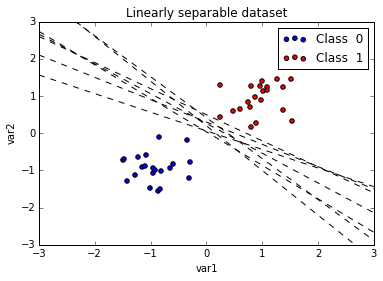

In [97]:
plt.figure(2)
plt.title('Linearly separable dataset')
plt.scatter(X_train_validation_scaled[(y == 0),0],X_train_validation_scaled[(y == 0),1],c = 'b',label = 'Class  0')
plt.scatter(X_train_validation_scaled[(y == 1),0],X_train_validation_scaled[(y == 1),1],c = 'r',label = 'Class  1')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([x_ticks for x_ticks in xrange(-3,4)])
plt.yticks([y_ticks for y_ticks in xrange(-3,4)])
plt.xlabel('var1')
plt.ylabel('var2')
xx = np.linspace(-3,3,10)
plt.legend(loc = 'upper right')
plt.plot(xx, -1.1 * xx + np.random.uniform() - 0.5,'k--',c = 'k')
plt.plot(xx, -1.2 * xx + np.random.uniform() - 0.5,'k--',c = 'k')
plt.plot(xx, -0.9 * xx + np.random.uniform() - 0.5,'k--',c = 'k')
plt.plot(xx, -0.8 * xx + np.random.uniform() - 0.5,'k--',c = 'k')
plt.plot(xx, -0.7 * xx + np.random.uniform() - 0.5,'k--',c = 'k')
plt.plot(xx, -0.6 * xx + np.random.uniform() - 0.5,'k--',c = 'k')
plt.plot(xx, -0.5 * xx + np.random.uniform() - 0.5,'k--',c = 'k')


Support vector machines algorithm finds the support vectors that maximize the distance between the classes. In this case the two points in circles are the support vectors, and the optimal separating line is the line that passes mid-way between them.

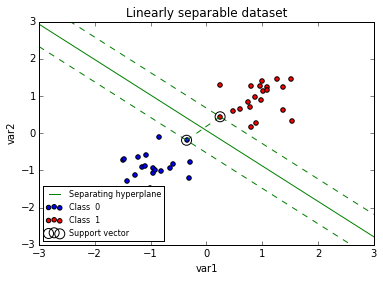

In [98]:
#Create the SVM classifier. Set the C variable to a high value to get
#hard margins, because we know that our data is linearly separable
classifier_svm = svm.SVC(kernel='linear',probability=True,C=100)
#Fit the classifier
classifier_svm.fit(X_train_validation_scaled,y)
#Get class predictions
predictions = classifier_svm.predict(X_train_validation_scaled)
#Get class probabilities
probabilities = classifier_svm.predict_proba(X_train_validation_scaled)[:,1]

index_array = []
for i in xrange(len(classifier_svm.support_vectors_)):
    index_array.append(np.where((X_train_validation_scaled==classifier_svm.support_vectors_[i]).all(axis=1))[0])

#Plot the scaled linearly separable dataset with the supports
plt.figure(2)
plt.scatter(X_train_validation_scaled[(y == 0),0],X_train_validation_scaled[(y == 0),1],c = 'b',label = 'Class  0')
plt.scatter(X_train_validation_scaled[(y == 1),0],X_train_validation_scaled[(y == 1),1],c = 'r',label = 'Class  1')
plt.scatter(classifier_svm.support_vectors_[:,0],classifier_svm.support_vectors_[:,1],label = 'Support vector',s=100,facecolors='none', zorder=10)
plt.title('Linearly separable dataset')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([x_ticks for x_ticks in xrange(-3,4)])
plt.yticks([y_ticks for y_ticks in xrange(-3,4)])
plt.xlabel('var1')
plt.ylabel('var2')

#Get hyperplane weights
w = np.ravel(classifier_svm.coef_)

#The equation of the hyperplane is given by:
#is w1 * x_1 + w2 * x_2 + b = 0, then 
#(-b/w1,0) and (0,-b/w2) are two points on the hyperplane, found by 
#setting x_2 and x_1 to 0, respectively.
#When x_1 is zero:
#(w1 * 0 + w2 * x_2 + b = 0) -->> x_2 = -b/w1
#when x_2 is zero:
#(w1 * x_1 + w2 * 0 + b = 0) -->> x_1 = -b/w2
#The slope of the hyperplane and the intercept is then:
#y = ((-b/w2)/(-(-b/w1))) * x + (-b/w2)
#y = -(w1/w2) * x - b/w2

#Due to python indexing that starts at 0, the first weight is w[0]
#Get hyperplane slope
hyperplane_slope = -w[0]/w[1]
#Get hyperplane intercept
hyperplane_intercept = -classifier_svm.intercept_[0]/w[1]
#The hyperplanes that pass through the support vectors is given by:
#w1 * x_1 + w2 * x_2 + b = 1
#w1 * x_1 + w2 * x_2 + b = -1
#When the canonical hyperplane is assumed to be the separating 
#hyperplane:
#For y = 0 (separating hyperplane), (-b/w1,0),(0,-b/w2)
#For y = 1 ((1-b)/w1,0),(0,(1-b)/w2)
#For y = -1 ((-1-b)/w1,0),(0,(-1-b)/w2)
hyperplane_intercept_low = (1-classifier_svm.intercept_[0])/w[1]
hyperplane_intercept_high = (-1-classifier_svm.intercept_[0])/w[1] 
#Get an array of x values
xx = np.reshape(np.linspace(-3, 3,10),10,1)
#Plot the hyperplane points by using the xx array as an argument for the hyperplane
#equation
hyperplane_points = np.dot(xx,hyperplane_slope) + hyperplane_intercept
#Get the intercept for the hyperplanes that pass through the support vectors
#These hyperplanes have the same slope as the separating hyperplane but different
#intercept. 
hyperplane_points_low = np.dot(xx,hyperplane_slope) + hyperplane_intercept_low
hyperplane_points_high = np.dot(xx,hyperplane_slope) + hyperplane_intercept_high
#Add hyperplanes to the plot
plt.plot(xx,hyperplane_points,c = 'g',label = 'Separating hyperplane')
plt.plot(xx,hyperplane_points_low,'k--',c = 'g')
plt.plot(xx,hyperplane_points_high,'k--',c = 'g')

perpendicular_slope = -1/hyperplane_slope
perpendicular_bias = classifier_svm.support_vectors_[0,1] - perpendicular_slope * classifier_svm.support_vectors_[0,0]
to_hyperplane_x = (perpendicular_bias - hyperplane_intercept)/(hyperplane_slope - perpendicular_slope)
to_hyperplane_y = hyperplane_slope * to_hyperplane_x + hyperplane_intercept 

plt.plot([classifier_svm.support_vectors_[0,0],to_hyperplane_x],[classifier_svm.support_vectors_[0,1],to_hyperplane_y],'k--',c = 'g')

perpendicular_slope = -1/hyperplane_slope
perpendicular_bias = classifier_svm.support_vectors_[1,1] - perpendicular_slope * classifier_svm.support_vectors_[1,0]
to_hyperplane_x = (perpendicular_bias - hyperplane_intercept)/(hyperplane_slope - perpendicular_slope)
to_hyperplane_y = hyperplane_slope * to_hyperplane_x + hyperplane_intercept

plt.plot([classifier_svm.support_vectors_[1,0],to_hyperplane_x],[classifier_svm.support_vectors_[1,1],to_hyperplane_y],'k--',c = 'g')
plt.legend(loc = 'lower left',prop={'size':8})

The optimal separating line (separating hyperplane in higher dimensions) is given by the equation:
$$ h(x)=w^T x + b = 0 $$

$$ h(x)=w_{1} x_{1} + w_{2} x_{2} + ... + w_{d} x_{d} + b = 0 $$

where $w$ is a vector of weights of length $d$, $x$ is a vector of inputs and $b$ is the bias term. 
The distance of a point $x$ to a hyperplane is given by:

$$ distance = \frac{y h(x)}{\lVert{w}\lVert} $$  

where $y$ is the class of the instance and is either 1 or -1, which specifies the direction of the point. $h(x)$ is the equation of the hyperplane evaluated at point $x$ and $\lVert{w}\lVert$ is given by $$\lVert{w}\lVert=\sqrt{(w_{1}^2+w_{2}^2+...+w_{d}^2)}$$

The margin of a linear classifier is the point $x$ with the minimum distance to the separating hyperplane and is given by:

$${distance}^{\ast}=min_{x_{i}} {y \frac{h(x)}{\lVert{w}\lVert}}=min_{x_{i}}\frac{y(w^T x_{i}+b)}{\lVert{w}\lVert}$$

The vectors that achieve this minimum distance are called the support vectors for that hyperplane. If we denote these support vectors as $x^{\ast}$ then we have: 

$${distance}^{\ast}=y^{\ast}\frac{w^T x^{\ast}+b}{\lVert{w}\lVert}$$, where $y^{\ast}$ is the class label for the support vector $x^{\ast}$.

Note that we can represent $(w^T x^{\ast} + b)$ in an infinite number of ways by scaling $w^T$ and $b$. The scaling factor $s$ is chosen so that $y^{\ast} (w^T x^{\ast}+b)=1$

The distance of the support vectors to the separating hyperplane is then:

$$distance^{\ast}=\frac{y^{\ast} h(x^{\ast})}{\lVert{w}\lVert}=\frac{1}{\lVert{w}\lVert}$$

SVM algorithm finds the hyperplane that maximizes the distance between different classes, by maximizing: 

$$\frac{2}{\lVert{w}\lVert}$$ 

or equivalently, minimizing the following objective function:

Objective function$$min_{w,b} \frac{\lVert{w}\lVert^2}{2}$$

Linear Constraints $$y_{i} (w^T x_{i+b}) \ge 1$$

The linear constraints imply that instances that belong to negative class should be assigned a value of -1, and instances that belong to positive class should be assigned a value of 1.

Objective funciton: $$min_{w,b}\frac{\lVert{w}\lVert^2}{2}$$

Linear constraints: $$y_{i} (w^T x_{i}+b)\ge1$$

This function can be turned into a dual problem by introducing a Lagrange multiplier $a_{i}$ for each linear constraint to write:

$ min L = \frac{1}{2} \lVert{w}\lVert^2 − \sum_{i=1}^{n} a_{i} (y_{i} (w^T x_{i}+b)-1) $

subject to: $ a_{i} (y_{i} (w^T x_{i}+b)-1)=0,$ and $a_{i}\ge0$

Taking the derivative of $L$ with respect to $w$ and $b$ and setting derivatives to zero gives us the optimum $w$ and $b$ in terms of $a_{i}$, $x_{i}$ and $y_{i}$. Plugging these in the objective function, we get the dual problem. 

$max_{a} L dual = \sum_{i=1}^{n} a_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j}^{n} a_{i} a_{j} y_{i} y_{j} x_{i}^T x_{j} $

Subject to: $a_{i} \ge 0$ and $\sum_{i=1}^{n} a_{i} y_{i} \ge0$

But we do not always have a linearly separable case. It might not be possible to separate the classes without a transformation. 

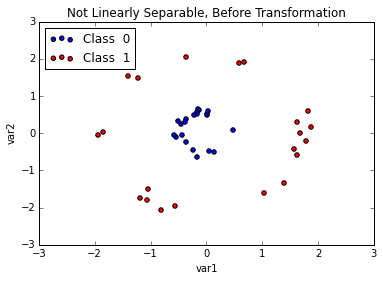

In [99]:
#Linearly separable at a higher dimension
#Load linearly separable data set
rbf = read_csv('rbf.csv')
#Get the response variable
y = pd.DataFrame(rbf['dep'],columns = ['dep'],index = rbf.index.values)
#Drop the response variable from dataset
X_untransformed = rbf.drop(['dep'],axis = 1)
#Set index
X_untransformed = X_untransformed.set_index(rbf.index.values)
#Get variable names
variable_names = list(X_untransformed.columns.values)
#Convert X to numpy array
X_untransformed = np.array(X_untransformed)
#Make the response variable one dimensional
y = np.ravel(np.array(y))
#Scale the data
X_train_validation_untransformed_scaled = preprocessing.scale(X_untransformed)

#Plot the scaled linearly non-separable data
plt.figure(3)
plt.title('Not linearly separable in input space')
plt.scatter(X_train_validation_untransformed_scaled[(y == 0),0],X_train_validation_untransformed_scaled[(y == 0),1],c = 'b',label = 'Class  0')
plt.scatter(X_train_validation_untransformed_scaled[(y == 1),0],X_train_validation_untransformed_scaled[(y == 1),1],c = 'r',label = 'Class  1')
plt.title('Not Linearly Separable, Before Transformation')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('var1')
plt.ylabel('var2')
plt.legend(loc = 'upper left')
plt.savefig('Linearly not separable dataset')

What we can do is to project the data into a higher dimension. We can use the following projection. 


$\Phi:(x_{1}, x_{2}) -> (x^{2}_{1}, x^{2}_{1}, \sqrt{2} x_{1} x_{2})$

Now we have a dataset with three features. After the projection, the data which was not linearly separable in input space, is now separable at the feature space.

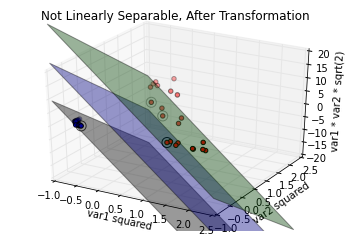

In [100]:
#Transform data
#Separate the response variable from the dataframe
y = pd.DataFrame(rbf['dep'],columns = ['dep'],index = rbf.index.values)
#Drop the response variable from dataset
X = rbf.drop(['dep'],axis = 1)
#Set index
X = X.set_index(rbf.index.values)
#Project the data to a higher dimension
X['var3'] = X['var1'] * X['var2'] * np.power(2,0.5)
X['var1'] = np.power(X['var1'],2)
X['var2'] = np.power(X['var2'],2)
#Get the variable names
variable_names = list(X.columns.values)
#Convert X to a numpy array
X = np.array(X)
#Make the response variable one dimensional
y = np.ravel(np.array(y))
#Scale the data
X_train_validation_scaled = preprocessing.scale(X)

#Draw the feature space
fig = plt.figure(4)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_validation_scaled[(y == 0),0],X_train_validation_scaled[(y == 0),1],X_train_validation_scaled[(y == 0),2],c = 'b')
ax.scatter(X_train_validation_scaled[(y == 1),0],X_train_validation_scaled[(y == 1),1],X_train_validation_scaled[(y == 1),2],c = 'r')
ax.set_xlabel('var1 squared')
ax.set_ylabel('var2 squared')
ax.set_zlabel('var1 * var2 * sqrt(2)')
ax.set_xlim(-1,2.5)
ax.set_ylim(-1,2.5)
ax.set_zlim(-20,20)
plt.title('Not Linearly Separable, After Transformation')
plt.legend(loc = 'best')
#Fit svm to projection of the data. Use a high C value to make sure that hard margins
#are used and the classes are completely separated. 
classifier_svm = svm.SVC(kernel='linear',probability=True,C=1000)
classifier_svm.fit(X_train_validation_scaled,y)

#Get the indices of the observations which are support vectors
support_indices = []
for i in xrange(len(classifier_svm.support_vectors_)):
    support_indices.append(np.where(X_train_validation_scaled==classifier_svm.support_vectors_[i])[0][0])
    
#Get predictions
predictions = classifier_svm.predict(X_train_validation_scaled)
#Get probabilities
probabilities = classifier_svm.predict_proba(X_train_validation_scaled)[:,1]
#Get the weights of the hyperplane
w = np.ravel(classifier_svm.coef_)
#Get the bias term
bias = classifier_svm.intercept_[0]
#Get an array for x and y to be used in the hyperplane equation
xx, yy = np.meshgrid(np.linspace(-1,2.5,10),np.linspace(-1,2.5,10))
#Calculate corresponding z using the hyperplane equation
#z1 = w[0] * w[1] * ((xx/(w[1] * w[2])) + (yy/(w[0] * w[2])) + (bias/(w[0] * w[1] * w[2])))
####For y = 0 (separating hyperplane), (-b/w1,0,0),(0,-b/w2,0),(0,0,-b/w3)
####For y = 1 ((1-b)/w1,0,0),(0,(1-b)/w2,0),(0,0,(1-b)/w3)
####For y = -1 ((-1-b)/w1,0,0),(0,(-1-b)/w2,0),(0,0,(-1-b)/w3)
z1 = (-bias - w[0] * xx - w[1] * yy)/w[2]
z1_low = (1-bias - w[0] * xx - w[1] * yy)/w[2]
z1_high = (-1-bias - w[0] * xx - w[1] * yy)/w[2]

#Plot the hyperplane
ax.plot_surface(xx,yy,z1, color='blue',alpha=0.4)
ax.plot_surface(xx,yy,z1_low, color='green',alpha=0.4)
ax.plot_surface(xx,yy,z1_high, color='black',alpha=0.4)
ax.scatter(X_train_validation_scaled[support_indices,0],X_train_validation_scaled[support_indices,1],X_train_validation_scaled[support_indices,2],s=100,facecolors='none', zorder=10)

When projecting the data to a higher dimension, there is no need to calculate the projection explicitly for all data points. 

Instead, a kernel (a similarity function) can be used between all pairs of data.  

We used $\Phi$ to project the data to a feature space. Substituting the input vectors with the transformation in the dual optimization problem:

$max_{a} L dual = \sum_{i=1}^{n} a_{i} − \frac{1}{2} \sum_{i=1}^{n} \sum_{i=1}^{n} a_{i} a_{j} y_{i} y_{j} \Phi(x_{i})^T \Phi(x_{j})$

with respect to: $a_{i}\ge0$ and $\sum_{i=1}^{n} a_{i} y_{i}$

This requires projecting the data to feature space, and then to take the cross product. 

Instead of calculating the coordinates of the inputs in the feature space and taking their dot product, we can use a kernel function that calculates the inner product of the features directly, without even knowing the transformation equation $\Phi$. This is known as the ‘kernel trick’.

For example, instead of calculating the coordinates like we did before:


we can calculate the inner product of \Phi using a linear Kernel:

$$\Phi(x_{i})^T \Phi$(x_{j} )=(x_{i,1}^2,x_{i,2}^2,\sqrt{2} x_{i,1} x_{i,2})(x_{j,1}^2, x_{j,2}^2, \sqrt{2} x_{j,1} x_{j,2})$$

$$=x_{i,1}^2 x_{j,1}^2+x_{i,2}^2 x_{j,2}^2+2x_{i,1} x_{i,2} x_{j,1} x_{j,2}$$

$$=(x_{i}^T x_{j}^2)$$

After calculating $k(x_{i},x_{j})=(x_{i}^T x_{j})^2$ , we can perform optimization on the dual problem:

$$ max_{a} L dual = \sum_{i=1}^{n} a_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{i=1}^{n} a_{i} a_{j} y_{i} y_{j} K(x_{i},x_{j})$$

with respect to: $a_{i}\ge0$ and $\sum_{i=1}^{n} a_{i} y_{i}$
    
Note that we no longer use $\Phi$, we can just specify the kernel function:

In [101]:
def polynomial_kernel(X_i,X_j):
    return (np.power(np.dot(X_i,X_j.T),2))

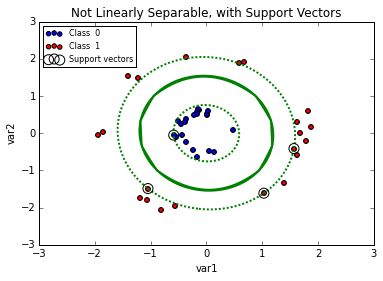

In [102]:
#Plot the support vectors in the input space
#Get the response variable
plt.figure(6)
plt.scatter(X_train_validation_untransformed_scaled[(y == 0),0],X_train_validation_untransformed_scaled[(y == 0),1],c = 'b',label = 'Class  0')
plt.scatter(X_train_validation_untransformed_scaled[(y == 1),0],X_train_validation_untransformed_scaled[(y == 1),1],c = 'r',label = 'Class  1')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('var1')
plt.ylabel('var2')
plt.title('Not Linearly Separable, with Support Vectors')
xx, yy = np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,100))
classifier_svm = svm.SVC(kernel=polynomial_kernel,probability=True,C=10000)
classifier_svm.fit(X_train_validation_untransformed_scaled,y)
Z = classifier_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X_train_validation_untransformed_scaled[classifier_svm.support_,0],X_train_validation_untransformed_scaled[classifier_svm.support_,1],label = 'Support vectors',s=100,facecolors='none', zorder=10)
plt.legend(loc = 'upper left',prop={'size':8})
plt.contour(xx,yy,Z,levels = [0], linewidths = 2,colors ='g',linetypes = 'dashed')

cs = plt.contour(xx,yy,Z + 1,levels = [0], linewidths = 2,colors='g',linetypes = 'dashed')
for c in cs.collections:
    c.set_dashes([(0, (2.0, 2.0))])

    cs = plt.contour(xx,yy,Z - 1,levels = [0], linewidths = 2,colors='g',linetypes = 'dashed')
for c in cs.collections:
    c.set_dashes([(0, (2.0, 2.0))])

xx, yy = np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,10))

classifier_svm = svm.SVC(kernel=polynomial_kernel,probability=True,C=100)
classifier_svm.fit(X_train_validation_untransformed_scaled,y)

Z = classifier_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contours = plt.contour(xx,yy,Z,levels = [0], linewidths = 2,linetypes = '--',colors = 'g')

plt.scatter(X_train_validation_untransformed_scaled[(y == 0),0],X_train_validation_untransformed_scaled[(y == 0),1],c = 'b',label = 'Class  0')
plt.scatter(X_train_validation_untransformed_scaled[(y == 1),0],X_train_validation_untransformed_scaled[(y == 1),1],c = 'r',label = 'Class  1')
plt.show()